# Выявление определяющие успешность игры закономерности.



## Описание проектра

«Стримчик» интернет-магазин, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

+ Name — название игры
+ Platform — платформа
+ Year_of_Release — год выпуска
+ Genre — жанр игры
+ NA_sales — продажи в Северной Америке (миллионы долларов)
+ EU_sales — продажи в Европе (миллионы долларов)
+ JP_sales — продажи в Японии (миллионы долларов)
+ Other_sales — продажи в других странах (миллионы долларов)
+ Critic_Score — оценка критиков (максимум 100)
+ User_Score — оценка пользователей (максимум 10)
+ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

***План действий:***
+ Открыть файл с данными и изучить общую информацию
+ Подготовить данные
+ Провести исследовательский анализ данных
+ Составить портрет пользователя каждого региона
+ Проверить гипотезы
+ Написать общий вывод

## Шаг 1. Откроем файл с данными и изучем общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
len(games['Name'].unique())

11560

In [6]:
games['Platform'].value_counts()# Платформы

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [7]:
games['Genre'].value_counts()# Жанры

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [8]:
games['User_Score'].value_counts()# Оценка пользователей (максимум 10)

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
0.5       2
1.1       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [9]:
games['Critic_Score'].value_counts()# Оценка критиков (максимум 100)

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

In [10]:
games['Rating'].value_counts()# Возрастной рейтинг

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [11]:
games.duplicated().sum()# Дубликаты

0

In [12]:
games.isna().sum()# Пропуски

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

+ *Мы имеем датасет из 16715 записей.Приведём название столбцов к нижнему регистру, поработаем с пропусками. В столбце 'User_Score' помимо пропусков присутствует аббревиатура tbd, скорее всего это (To Be Determined), то есть "Будет определено". Так же в некоторых столбцах уместно поменять тип данных.*



## Шаг 2. Подготовка данных

**Приведём название столбцов к нижнему регистру**

In [13]:
games.columns = games.columns.str.lower()

**Преобразуем данные в нужные типы**

In [14]:
games['user_score'] = games['user_score'].replace('tbd','NaN')# Преобразуем пропуски `tbd` в NaN

In [15]:
games['year_of_release'] = games['year_of_release'].astype('Int64')# Год выпуска должен быть целочисленным числом
games['critic_score'] = games['critic_score'].astype('Int64')# Оценка критиков из первичного анализа должна быть целочисленным числом 
games['user_score'] = games['user_score'].astype('float64')# Оценка пользователей должна быть числом

**Обработаем пропуски**

In [16]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [17]:
def missing_game(col):
    
    return games[games[col].isnull()]

In [18]:
missing_game('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 пропуска в столбце name совпадают с пропусками в столбце genre. Об этих играх почти ничего не известно, поэтому удалим их.

In [19]:
games.drop(missing_game('name').index , inplace=True)

In [20]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Остальные пропуски пока оставим. 
+ 269 пропусков в year_of_release это ~1,6% и их отсутствие не должно повлиять на результат. 
+ 8576,9123 и 6764 пропусков в столбцах critic_score,user_score и rating, это ~51%,~55% и ~40% процентов данных соответственно. Удаление или приведение к медиане может исказить конечный результат.


**Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец**

In [21]:
games['total_sales'] = games.loc[:,['na_sales', 'eu_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

## Шаг 3. Проведём исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы**

In [22]:
games_per_year = (
    games[['name', 'year_of_release']]
        .drop_duplicates()
        .pivot_table(index='year_of_release', values='name', aggfunc='count')
        .sort_values('year_of_release', ascending=False)
)

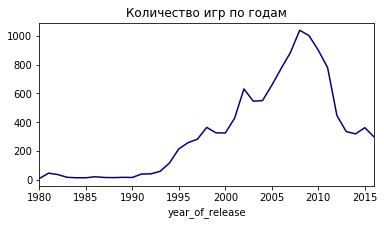

In [23]:
games_per_year.plot(figsize=(6, 3), colormap='jet', legend=False, title='Количество игр по годам')
        
plt.show()

Судя по диаграмме, данные до 1995 года нам менее интересны.


**Посмотрим, как менялись продажи по платформам.**

In [24]:
def total_sales_per_platform(df):
    return (
        df
            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
            .sort_values('total_sales', ascending=False)
    )

In [25]:
def bar_plot(df):
    (
        df
            .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
            .set(xlabel='Платформа', ylabel='Глобальные продажи')
    )
    plt.show()

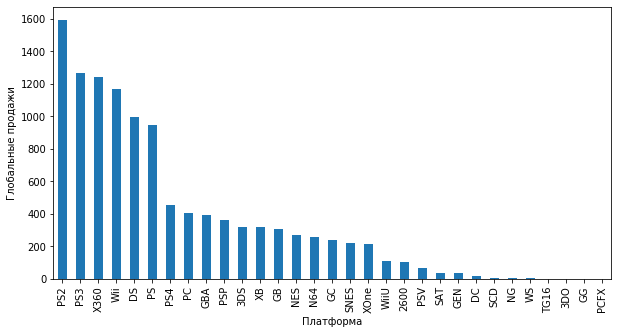

In [26]:
bar_plot(total_sales_per_platform(games))

<font color='blue'> Лидеры продаж выделены верно.</font>

Выберем первые пять платформ с наибольшими суммарными продажами и построем распределение по годам.

In [27]:
top5 = total_sales_per_platform(games).head(5)
top5

,total_sales
platform,
PS2,1595.06
PS3,1269.94
X360,1242.18
Wii,1169.72
DS,995.01


In [28]:
def yearly_total_sales_by_platform(name, df):
    
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

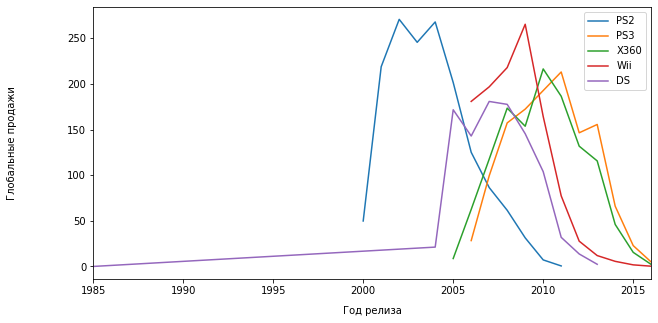

In [29]:
for platform in list(top5.index):
    yearly_total_sales_by_platform(platform, games)['total_sales'].plot(figsize=(10, 5), label=platform)
    plt.xlabel("Год релиза", labelpad=10)
    plt.ylabel("Глобальные продажи", labelpad=50)
    plt.legend()

Примерно за 10 лет появляются новые и исчезают старые платформы, возьмём в актуальный период половину из них, так как нас интересуют растущие и развивающиеся платформы.

In [30]:
actual_years = (games['year_of_release'] > 2011) & (games['year_of_release'] <= 2016)
actual_games = games.loc[actual_years]

**Какие платформы лидируют по продажам, растут или падают**

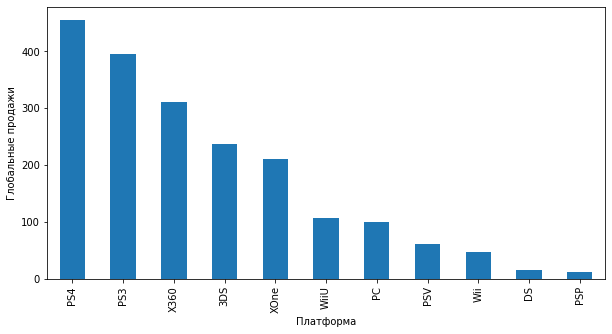

In [31]:
total_sales = total_sales_per_platform(actual_games)
bar_plot(total_sales)

**Какие из них растут или падают?**

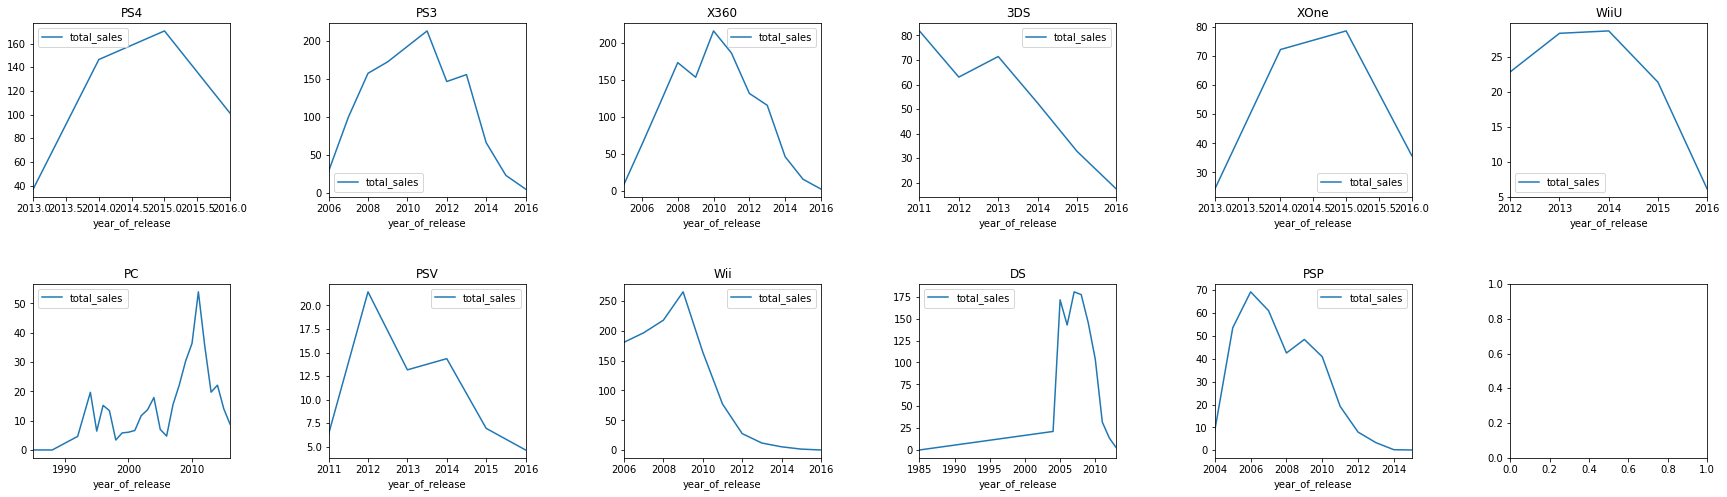

In [32]:
platforms = list(total_sales.index)

fig, ax = plt.subplots(nrows=2, ncols=6, figsize = (30,8))
fig.subplots_adjust(wspace=0.5, hspace = 0.5)
for i in range (len(platforms)):
    df_1 = games[games['platform'] == platforms[i]].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    df_1.plot(kind='line',  ax = ax[i//6, (i)%6], title=platforms[i]);

plt.show()

По графикам видим, что несмотря на лидирующие продажи за актуальный период, эра большинства платформ подходит к концу и продажи значительно падают. Из перспективных – консоли нового поколения:

PS4: ~100 млн.
XOne: ~40 млн. 
Их мы и возьмём для построения графика "ящик с усами".

**Построем график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам**

Среднее значение глобальных продаж игр для PS4: 113.80750000000005
Среднее значение глобальных продаж игр для XOne: 52.7275


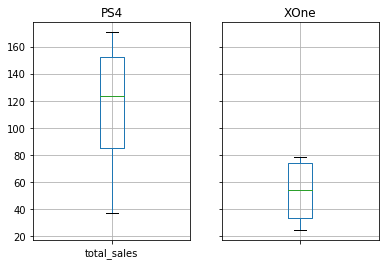

In [33]:
promising_platforms = ['PS4', 'XOne']

fig, axs = plt.subplots(1, 2, sharey=True)

# построение графиков продаж по каждой платформе
for num, platform in enumerate(promising_platforms):
    df = yearly_total_sales_by_platform(platform, actual_games)
    print(f"Среднее значение глобальных продаж игр для {platform}: {df['total_sales'].mean()}")
    df.boxplot('total_sales', ax=axs[num])
    axs[num].set_title(platform)

plt.tick_params(labelcolor='none', bottom='off')
plt.subplots_adjust(left=0.1)
plt.show()

Сумма глобальных продаж игр для PS4 примерно в 2 раза больше чем у Xbox One.


**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

In [34]:
ps4 = actual_games.query("platform == 'PS4'")
xone = actual_games.query("platform == 'XOne'")

In [35]:
features = ['user_score', 'critic_score', 'total_sales']
ps4[features].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.038308
critic_score,0.557654,1.000000,0.389944
total_sales,-0.038308,0.389944,1.000000


In [36]:
xone[features].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.067145
critic_score,0.472462,1.000000,0.417843
total_sales,-0.067145,0.417843,1.000000


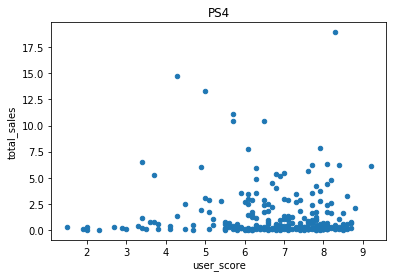

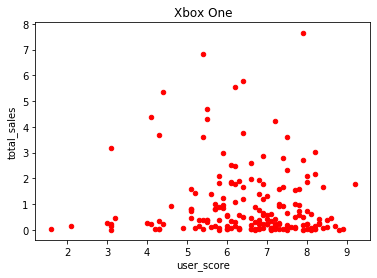

In [37]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='user_score', y='total_sales', kind='scatter', title='Xbox One', color='red')
plt.show()

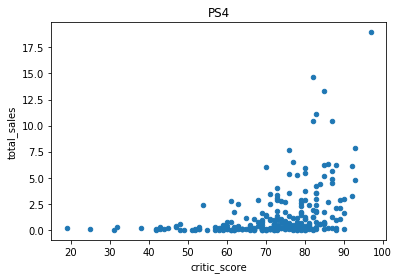

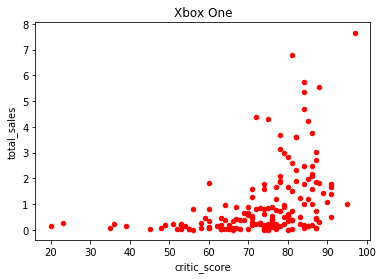

In [38]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='critic_score', y='total_sales', kind='scatter', title='Xbox One', color='red')
plt.show()

+ Взаимосвязи между отзывами пользователей и продажами нет;
+ Взаимосвязь между отзывами критиков и продажами существует, однако не слишком большая;
+ Взаимосязь между отзывами критиков и отзывами пользователей существует, чуть большая чем между отзывами критиков и продажами.

**Распределение игр по жанрам**

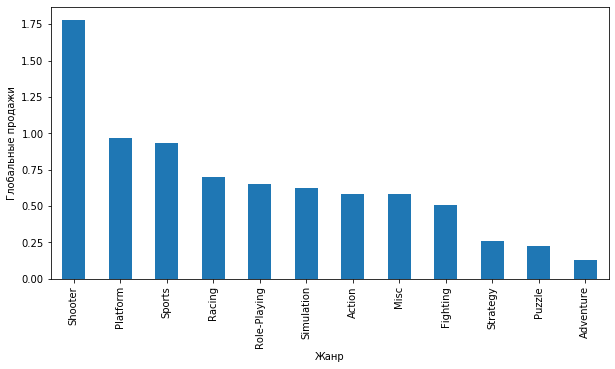

In [39]:
(actual_games
    .pivot_table(index='genre', values='total_sales')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

Самыми популярными жанрами являются шутеры, платформеры, а также спортивные игры. Хуже всего продаются стратегии и квесты.

## Шаг 4. Составим портрет пользователя каждого региона

### NA

In [40]:
plt.style.use('seaborn')

In [41]:
region = 'na_sales'

In [42]:
def top5_in_region(column):
    return (
        actual_games
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(5)
    )

In [43]:
def sales_pie_by_region(df):
    (
        df
            .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(10, 5), legend=False)
            .set(ylabel='Продажи')
    )
    plt.show()

**Самые популярные платформы (топ-5)**

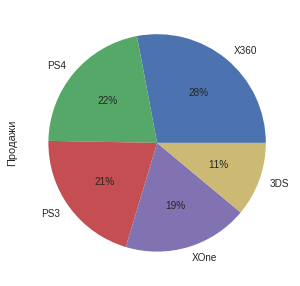

In [44]:
sales_pie_by_region(top5_in_region('platform'))

 В США более популярна XBox.

**Самые популярные жанры (топ-5)**

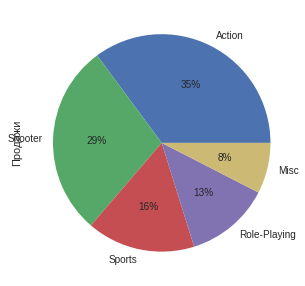

In [45]:
sales_pie_by_region(top5_in_region('genre'))

Экшены и шутеры – самые популярные жанры.

**Влияние рейтинга ESRB на продажи в отдельном регионе**

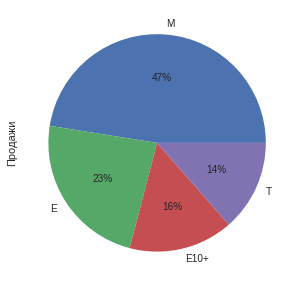

In [46]:
sales_pie_by_region(top5_in_region('rating'))

Большая доля игр приходится на игры, подходящие для детей, и только 29% продаж на игры для взрослой аудитории (17+)

### EU

In [47]:
region = 'eu_sales'

**Самые популярные платформы (топ-5)**

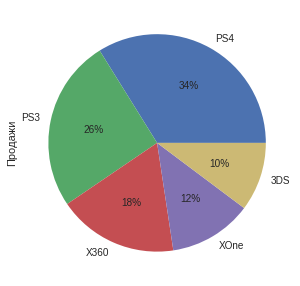

In [48]:
sales_pie_by_region(top5_in_region('platform'))

В Европе более популярна PlayStation.

**Самые популярные жанры (топ-5)**

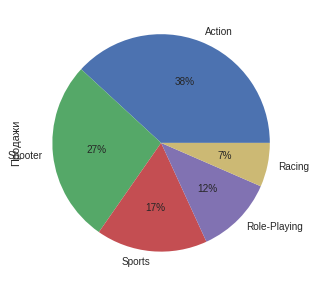

In [49]:
sales_pie_by_region(top5_in_region('genre'))

Экшены и шутеры – все также самые популярные жанры.

**Влияние рейтинга ESRB на продажи в отдельном регионе**

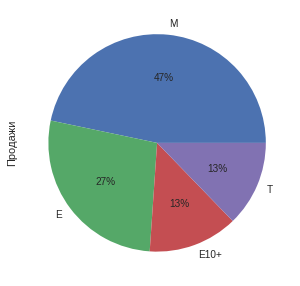

In [50]:
sales_pie_by_region(top5_in_region('rating'))

В Европе лучше продаются игры для взрослой аудитории, чем в США 33% против 29%.

### JP

In [51]:
region = 'jp_sales'

**Самые популярные платформы (топ-5)**

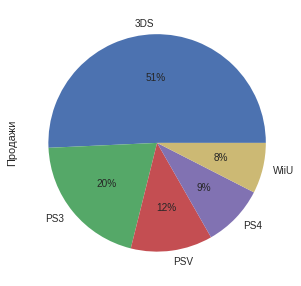

In [52]:
sales_pie_by_region(top5_in_region('platform'))

В Японии картина продаж кардинально меняется. Японцы много играют на портативных консолях типа Nintento (3)DS, PSP и пр. Здесь мы практически не видим присутствия Xbox в пятерке лидеров.

**Самые популярные жанры (топ-5)**

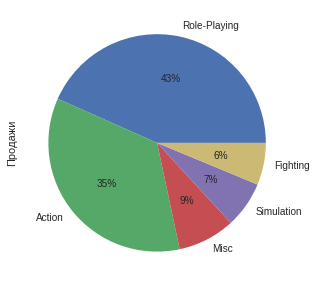

In [53]:
sales_pie_by_region(top5_in_region('genre'))

 Ролевые игры – самые популярные.

**Влияние рейтинга ESRB на продажи в отдельном регионе**

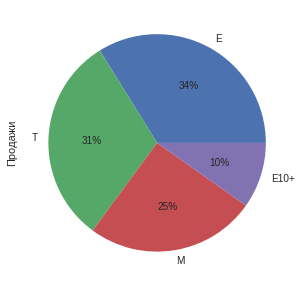

In [54]:
sales_pie_by_region(top5_in_region('rating'))

В Японии хуже всего продаются игры для взрослой аудитории – всего 17% продаж.


## Шаг 5. Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Мы рассматриваем две генеральные сопокупности – игры на разных платформах.
+ Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**.
+ Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC **различаются**.

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 3%.

In [55]:
alpha = .03
pc = actual_games.query("platform == 'PC'")

results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var=False,  # Welch’s t-test, который не предполагает равенство дисперсий
    nan_policy='omit' # игнорируем пропуски
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134426
Не получилось отвергнуть нулевую гипотезу


In [56]:
pc['user_score'].mean()

6.428640776699029

In [57]:
xone['user_score'].mean()

6.521428571428572

p-value получили равным ~4%. Если бы рейтинги пользователей НЕ отличались (наша нулевая гипотеза), то те различия, что мы фактически видим, могли бы получиться случайно лишь в 4% случаев. Это весьма маленькая вероятность. Таким образом, различия довольно высокие для предположения равенства рейтингов. Но так как мы задали жесткий уровень значимости (0.03), то говорим, что тем не менее не будем отклонять гипотезу, но со стандартным уровнем в 0.05 мы бы ее уже отвергли.

**Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.**

Мы рассматриваем две генеральные сопокупности – игры разных жанров.
+ Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports **одинаковые**.
+ Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports **различаются**.

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [58]:
alpha = .05
action = actual_games.query("genre == 'Action'")
sports = actual_games.query("genre == 'Sports'")

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    nan_policy='omit' # игнорируем пропуски
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.716308946093586e-26
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги различаются, и практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится.

## Шаг 6. Общий вывод

Платформы появляются и умирают в течение 10 лет. Наиболее популярные на данный момент платформы – это Sony PlayStation 4 и Xbox One. Они появились пару лет назад и имеют потенциал роста.
В США и Европе лучше всего продаются шутеры и экшены.Япония – отдельный рынок с уклоном в портативные консоли и ролевые игры.
Больше всего продаж приходятся на игры, разрешенные для детей.


Обе сформулированные гипотезы подтвердились:

+ Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
+ Средние пользовательские рейтинги жанров Action и Sports разные.